# top 10 customers per engagement metric 

In [1]:
import pandas as pd


df = pd.read_csv('../assets/data/Copy of Week2_challenge_data_source(CSV).csv')

# Ensure the column names match the expected ones
# Add total data volume column (DL + UL)
df['Total_Data_Volume'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

# Aggregate metrics per MSISDN
aggregated_metrics = df.groupby('MSISDN/Number').agg(
    sessions_frequency=('Bearer Id', 'count'),
    total_session_duration=('Dur. (ms)', 'sum'),
    total_traffic=('Total_Data_Volume', 'sum')
).reset_index()

# Define function to get top 10 customers for each metric
def get_top_10(df, metric):
    return df.sort_values(by=metric, ascending=False).head(10)

# Top 10 customers for each metric
top_10_sessions = get_top_10(aggregated_metrics, 'sessions_frequency')
top_10_duration = get_top_10(aggregated_metrics, 'total_session_duration')
top_10_traffic = get_top_10(aggregated_metrics, 'total_traffic')

# Display results
print("Top 10 Customers by Sessions Frequency:")
print(top_10_sessions)

print("\nTop 10 Customers by Total Session Duration:")
print(top_10_duration)

print("\nTop 10 Customers by Total Traffic:")
print(top_10_traffic)


Top 10 Customers by Sessions Frequency:
       MSISDN/Number  sessions_frequency  total_session_duration  \
13526   3.362632e+10                  18               8791927.0   
6437    3.361489e+10                  17               9966898.0   
13180   3.362578e+10                  17              18553754.0   
37052   3.365973e+10                  16               4035428.0   
76363   3.367588e+10                  15               4865947.0   
92923   3.376054e+10                  15               9279434.0   
65118   3.366716e+10                  13               8744914.0   
92577   3.376041e+10                  12               5321667.0   
1279    3.360452e+10                  12               5207990.0   
13994   3.362708e+10                  12               4703516.0   

       total_traffic  
13526   7.971167e+09  
6437    8.846226e+09  
13180   8.499621e+09  
37052   7.705863e+09  
76363   7.891111e+09  
92923   8.514774e+09  
65118   5.618394e+09  
92577   7.132371e+09  
1279

# classifying customers in three groups of engagement. 

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


df = pd.read_csv('../assets/data/Copy of Week2_challenge_data_source(CSV).csv')


# Add total data volume column (DL + UL)
df['Total_Data_Volume'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

aggregated_metrics = df.groupby('MSISDN/Number').agg(
    sessions_frequency=('Bearer Id', 'count'),
    total_session_duration=('Dur. (ms)', 'sum'),
    total_traffic=('Total_Data_Volume', 'sum')
).reset_index()

# Normalize the metrics
scaler = MinMaxScaler()
normalized_metrics = pd.DataFrame(
    scaler.fit_transform(aggregated_metrics[['sessions_frequency', 'total_session_duration', 'total_traffic']]),
    columns=['normalized_sessions_frequency', 'normalized_total_session_duration', 'normalized_total_traffic']
)

# Add normalized metrics back to the DataFrame
aggregated_metrics = pd.concat([aggregated_metrics, normalized_metrics], axis=1)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
aggregated_metrics['engagement_cluster'] = kmeans.fit_predict(normalized_metrics)

# Display results
print("Clustered Engagement Metrics:")
print(aggregated_metrics)

# Display cluster centers
print("\nCluster Centers:")
print(kmeans.cluster_centers_)


Clustered Engagement Metrics:
        MSISDN/Number  sessions_frequency  total_session_duration  \
0        3.360100e+10                   1                116720.0   
1        3.360100e+10                   1                181230.0   
2        3.360100e+10                   1                134969.0   
3        3.360101e+10                   1                 49878.0   
4        3.360101e+10                   2                 37104.0   
...               ...                 ...                     ...   
106851   3.379000e+10                   1                  8810.0   
106852   3.379000e+10                   1                140988.0   
106853   3.197021e+12                   1                877385.0   
106854   3.370000e+14                   1                253030.0   
106855   8.823971e+14                   1                869844.0   

        total_traffic  normalized_sessions_frequency  \
0        8.786906e+08                       0.055556   
1        1.568596e+08        

# minimum, maximum, average & total non-normalized metrics for each cluster.

Cluster Statistics:
   engagement_cluster  min_sessions_frequency  max_sessions_frequency  \
0                   0                       1                       4   
1                   1                       3                      18   
2                   2                       0                       2   

   avg_sessions_frequency  total_sessions_frequency  min_session_duration  \
0                2.184791                     46228               18235.0   
1                4.258194                     17020               49323.0   
2                1.043550                     85258                7142.0   

   max_session_duration  avg_session_duration  total_session_duration  \
0             3174824.0         215100.806229            4.551318e+09   
1            18553754.0         572159.112084            2.286920e+09   
2             1573420.0         107473.680857            8.780600e+09   

   min_total_traffic  max_total_traffic  avg_total_traffic  \
0       2.842182e+08   

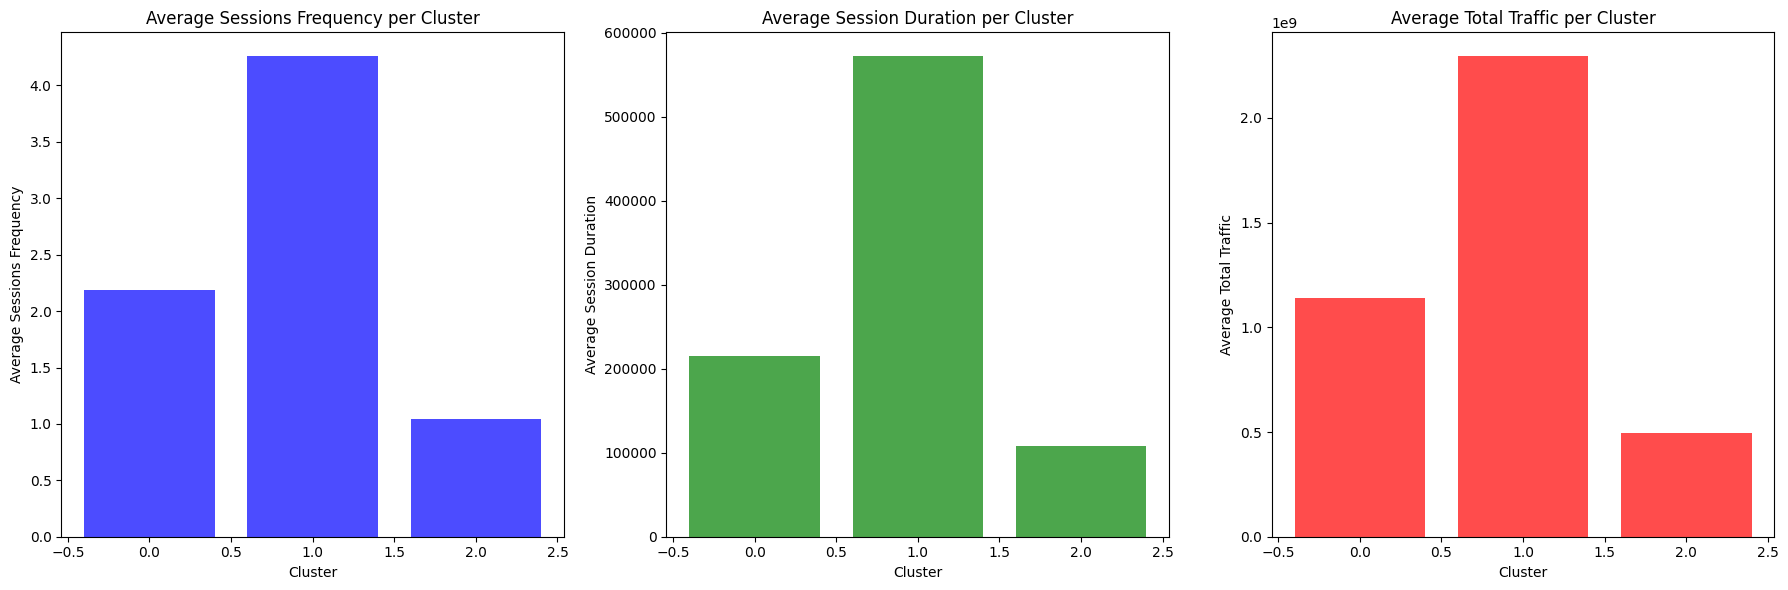

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv('../assets/data/Copy of Week2_challenge_data_source(CSV).csv')


# Add total data volume column (DL + UL)
df['Total_Data_Volume'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

aggregated_metrics = df.groupby('MSISDN/Number').agg(
    sessions_frequency=('Bearer Id', 'count'),
    total_session_duration=('Dur. (ms)', 'sum'),
    total_traffic=('Total_Data_Volume', 'sum')
).reset_index()

# Normalize the metrics
scaler = MinMaxScaler()
normalized_metrics = pd.DataFrame(
    scaler.fit_transform(aggregated_metrics[['sessions_frequency', 'total_session_duration', 'total_traffic']]),
    columns=['normalized_sessions_frequency', 'normalized_total_session_duration', 'normalized_total_traffic']
)

# Add normalized metrics back to the DataFrame
aggregated_metrics = pd.concat([aggregated_metrics, normalized_metrics], axis=1)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
aggregated_metrics['engagement_cluster'] = kmeans.fit_predict(normalized_metrics)

# Compute cluster statistics
cluster_stats = aggregated_metrics.groupby('engagement_cluster').agg(
    min_sessions_frequency=('sessions_frequency', 'min'),
    max_sessions_frequency=('sessions_frequency', 'max'),
    avg_sessions_frequency=('sessions_frequency', 'mean'),
    total_sessions_frequency=('sessions_frequency', 'sum'),
    min_session_duration=('total_session_duration', 'min'),
    max_session_duration=('total_session_duration', 'max'),
    avg_session_duration=('total_session_duration', 'mean'),
    total_session_duration=('total_session_duration', 'sum'),
    min_total_traffic=('total_traffic', 'min'),
    max_total_traffic=('total_traffic', 'max'),
    avg_total_traffic=('total_traffic', 'mean'),
    total_total_traffic=('total_traffic', 'sum')
).reset_index()

# Print cluster statistics
print("Cluster Statistics:")
print(cluster_stats)

# Visualize the results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Sessions Frequency
axes[0].bar(cluster_stats['engagement_cluster'], cluster_stats['avg_sessions_frequency'], color='blue', alpha=0.7)
axes[0].set_title('Average Sessions Frequency per Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Average Sessions Frequency')

# Session Duration
axes[1].bar(cluster_stats['engagement_cluster'], cluster_stats['avg_session_duration'], color='green', alpha=0.7)
axes[1].set_title('Average Session Duration per Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Average Session Duration')

# Total Traffic
axes[2].bar(cluster_stats['engagement_cluster'], cluster_stats['avg_total_traffic'], color='red', alpha=0.7)
axes[2].set_title('Average Total Traffic per Cluster')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Average Total Traffic')

plt.tight_layout()
plt.show()

# Interpretation (add your findings below this as needed):
# Analyze the visualizations to identify patterns in customer engagement.


# total traffic per application and top 10 most engaged users per application

In [20]:
import pandas as pd
import os

# List of file paths
file_paths = [
    '../assets/data/aggregated_Google_xdr_data.csv',
    '../assets/data/aggregated_Netflix_xdr_data.csv',
    '../assets/data/aggregated_Youtube_xdr_data.csv',
    '../assets/data/aggregated_Email_xdr_data.csv',
    '../assets/data/aggregated_Other_xdr_data.csv',
    '../assets/data/aggregated_Gaming_xdr_data.csv',
    '../assets/data/aggregated_Social Media_xdr_data.csv',
]

# Initialize an empty DataFrame to hold all the data
all_data = pd.DataFrame()

# Loop through the files and load the data into the all_data DataFrame
for file in file_paths:
    if os.path.exists(file):
        # Extract the application name from the filename (assuming it's part of the filename before '_xdr')
        application_name = file.split('aggregated_')[1].split('_xdr')[0]
        
        # Load the data into a DataFrame
        temp_df = pd.read_csv(file)
        
        # Add the application name as a new column
        temp_df['application_name'] = application_name
        
        # Append the data to the all_data DataFrame
        all_data = pd.concat([all_data, temp_df], ignore_index=True)
    else:
        print(f"File {file} does not exist.")

# Aggregate total traffic by user_id and application_name
total_traffic_per_user = all_data.groupby(['application_name', 'Bearer Id'])['Total_Data_Volume'].sum().reset_index()

# Save the total traffic per user per application to a new CSV
total_traffic_per_user.to_csv('../assets/data/total_traffic_per_user_per_application.csv', index=False)

# Sort the users by total data volume in descending order and get the top 10 most engaged users per application
top_10_users_per_application = total_traffic_per_user.sort_values(by='Total_Data_Volume', ascending=False).groupby('application_name').head(10)

# Save the top 10 most engaged users per application to a new CSV
top_10_users_per_application.to_csv('../assets/data/top_10_users_per_application.csv', index=False)


# Top 3 most used applications 

/tmp/ipykernel_12980/256004305.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='application_name', y='Total_Data_Volume', data=top_3_applications, palette='viridis')


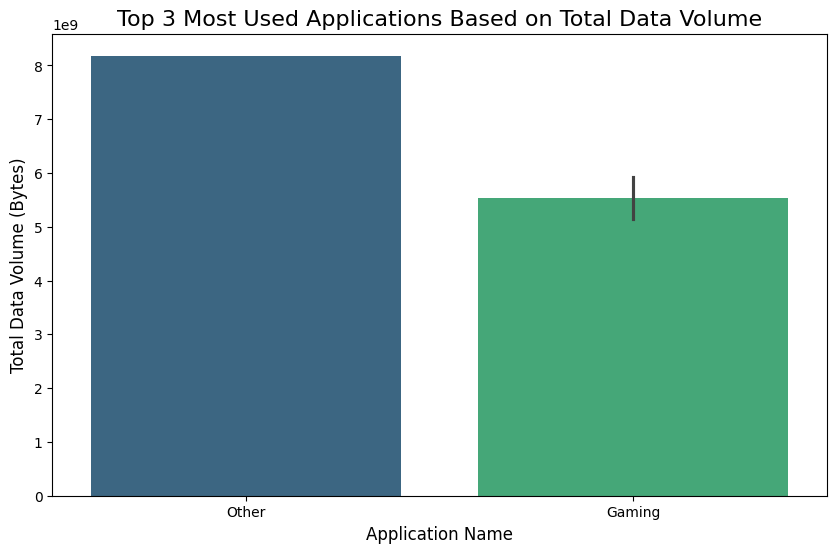

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the aggregated data (total traffic per application)
total_traffic_per_application = pd.read_csv('../assets/data/total_traffic_per_user_per_application.csv')

# Sort applications by total data volume and select the top 3 most used applications
top_3_applications = total_traffic_per_application.sort_values(by='Total_Data_Volume', ascending=False).head(3)

# Set up the plot using Seaborn and Matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x='application_name', y='Total_Data_Volume', data=top_3_applications, palette='viridis')

# Add titles and labels
plt.title('Top 3 Most Used Applications Based on Total Data Volume', fontsize=16)
plt.xlabel('Application Name', fontsize=12)
plt.ylabel('Total Data Volume (Bytes)', fontsize=12)

# Show the plot
plt.show()
